In [2]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import matplotlib as mpl

my_dateparser = lambda x: pd.datetime.strptime(x, "%Y %m %d %H %M")

path = 'shared-ns1000k/inputs/Aerosol_sizedist_obs/' 
all_files = glob.glob(path + "/Zeppelin_201*_hourly.csv")


myorder = [4, 0, 3, 2, 1]
mylist = [all_files[i] for i in myorder]
  
li = []

for filename in mylist:
    df = pd.read_csv(filename, parse_dates=[['0', '0.1', '0.2', '0.3', '0.4']], date_parser = my_dateparser)
    li.append(df)


df = pd.concat(li, axis=0, ignore_index=True)

df.rename(columns={'0_0.1_0.2_0.3_0.4':'Time'},inplace = True)
df.replace(-999, np.nan, inplace=True)
df.drop(labels=['0.5','0.6'], axis=1, inplace=True)
df = df.set_index('Time')

In [3]:
diam = df.columns
diam = ([float(ii) for ii in diam])
time = df.index
data = xr.DataArray(df.values,dims={'Time':time, 'Diameter':diam})
datas = xr.Dataset({'SizeDist':data})
datas['Time']=time
datas['Diameter']=diam

/opt/conda/lib/python3.7/site-packages/matplotlib/colors.py:1031: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


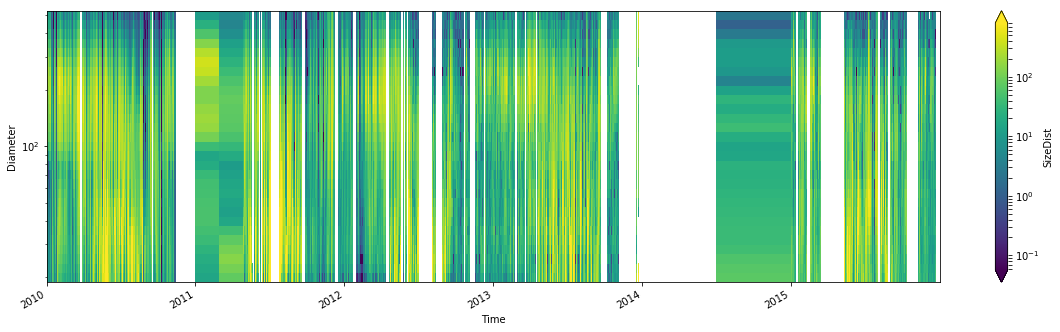

In [4]:
plt.figure(figsize=(20,5))
datas['SizeDist'].plot(x='Time', robust=True, yscale='log', norm=mpl.colors.LogNorm())

In [5]:
df_weekly = df.resample('w').mean()

In [6]:
diam = df_weekly.columns
diam = ([float(ii) for ii in diam])
time = df_weekly.index
data_w = xr.DataArray(df_weekly.values,dims={'Time':time, 'Diameter':diam})
datas_w = xr.Dataset({'SizeDist':data_w})
datas_w['Time']=time
datas_w['Diameter']=diam

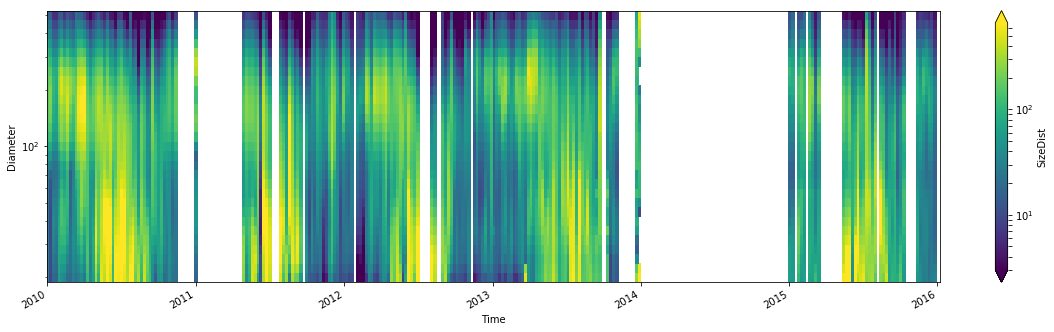

In [7]:
plt.figure(figsize=(20,5))
datas_w['SizeDist'].plot(x='Time', robust=True, yscale='log', norm=mpl.colors.LogNorm())

In [8]:
df_monthly = df.resample('m').mean()

In [10]:
diam = df_monthly.columns
diam = ([float(ii) for ii in diam])
time = df_monthly.index
data_m = xr.DataArray(df_monthly.values,dims={'Time':time, 'Diameter':diam})
datas_m = xr.Dataset({'SizeDist':data_m})
datas_m['Time']=time
datas_m['Diameter']=diam

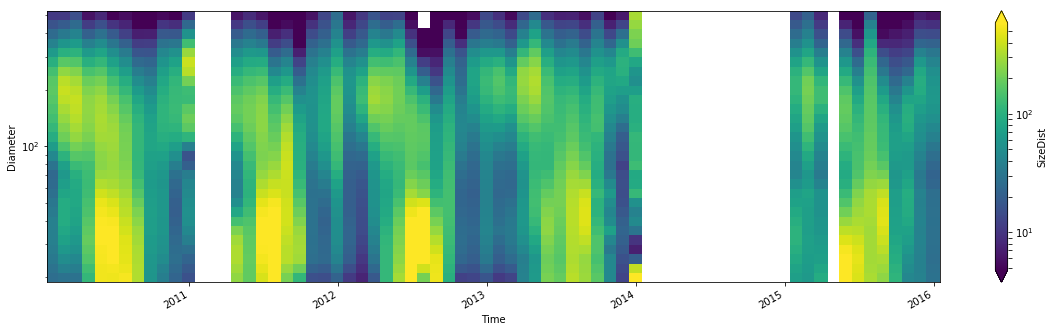

In [11]:
plt.figure(figsize=(20,5))
datas_m['SizeDist'].plot(x='Time', robust=True, yscale='log', norm=mpl.colors.LogNorm())